In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
import glob
import pathlib
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.utils import load_img, img_to_array
import os as os 

In [2]:
#Define the shape for the test inputs

image_size = (50, 50)
input_shape = (None,) + image_size + (3,)
batch_size = 32

In [3]:
#Loading the test data
test_dir = pathlib.Path('Data/test')

In [4]:
#Creating the test dataset

test_ds = image_dataset_from_directory(
    test_dir, 
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
    seed = 42,
)

Found 539 files belonging to 3 classes.


In [5]:
#Loading trained model
final_model = keras.models.load_model('shape_50_loss_0.6965.keras')

final_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_20 (Sequential)  (None, None, None, 3)     0         
                                                                 
 conv2d_110 (Conv2D)         (None, 50, 50, 128)       3584      
                                                                 
 batch_normalization_110 (Ba  (None, 50, 50, 128)      512       
 tchNormalization)                                               
                                                                 
 re_lu_110 (ReLU)            (None, 50, 50, 128)       0         
                                                                 
 max_pooling2d_110 (MaxPooli  (None, 25, 25, 128)      0         
 ng2D)                                                           
                                                                 
 conv2d_111 (Conv2D)         (None, 25, 25, 128)     

In [6]:
#Evaluating model on test set

final_model.evaluate(test_ds)

17/17 [==============================] - 1s 39ms/step - loss: 0.6549 - accuracy: 0.8219


[0.654863178730011, 0.8218923807144165]

In [7]:
#Extract class names for sample predictions

class_names = test_ds.class_names

print(class_names)

['crack', 'missing-head', 'paint-off']


In [8]:
#Loading the specified test samples

img_paths = ['Data/test/crack/test_crack.jpg', 
            'Data/test/missing-head/test_missinghead.jpg',
            'Data/test/paint-off/test_paintoff.jpg' 
]

test_imgs = []

for img in img_paths:
    img_array = img_to_array(load_img(img, target_size=image_size))
    img_batch = np.expand_dims(img_array, axis=0)
    test_imgs.append(img_batch)

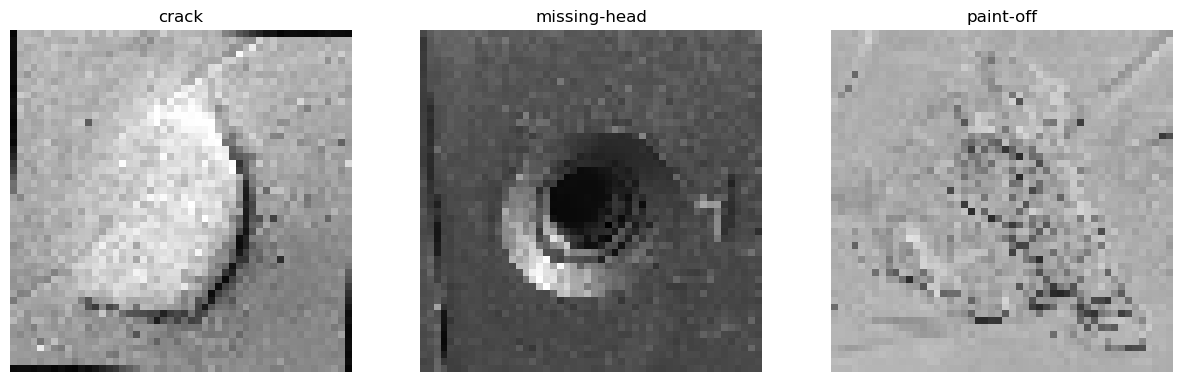

In [13]:
#Display the sample images

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, img_path in zip(axes, img_paths):
    img = load_img(img_path, target_size=image_size)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(img_path.split('/')[-2])

plt.show()

In [9]:
#Making predictions on the sample images

for img in test_imgs:
    print(final_model.predict(img))

1/1 [==============================] - 0s 207ms/step
[[0.7599716  0.0013478  0.23868051]]
1/1 [==============================] - 0s 24ms/step
[[3.1379994e-03 9.9678075e-01 8.1244456e-05]]
1/1 [==============================] - 0s 24ms/step
[[0.5625331  0.04314182 0.39432508]]
